In [79]:
#Qiskit imports
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Pauli, pauli_basis, SuperOp, PTM, Operator
#from qiskit.providers.aer.noise import NoiseModel, pauli_error
#from qiskit.providers.fake_provider import FakeVigoV2
#from qiskit.providers.aer import Aer, AerSimulator
from random import random

#python imports
from random import choice, choices
from itertools import product, permutations, cycle
from scipy.optimize import curve_fit, nnls
from matplotlib import pyplot as plt
import numpy as np

plt.style.use("ggplot")

In [80]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
home_folder = os.getcwd()
is_pyquil = "pyquil_program" in home_folder
if is_pyquil and "AutomatedPERTools" in home_folder:
	raise Exception("Both folders?")
i = 0
while not "pauli_lindblad_per" in os.listdir(home_folder):
	home_folder = os.path.dirname(home_folder)
	i+=1
	if i == 50:
		raise Exception("pauli_lindblad_per not found. Please make sure it is in this or a parent folder")
sys.path.append(os.path.join(home_folder, "pauli_lindblad_per"))

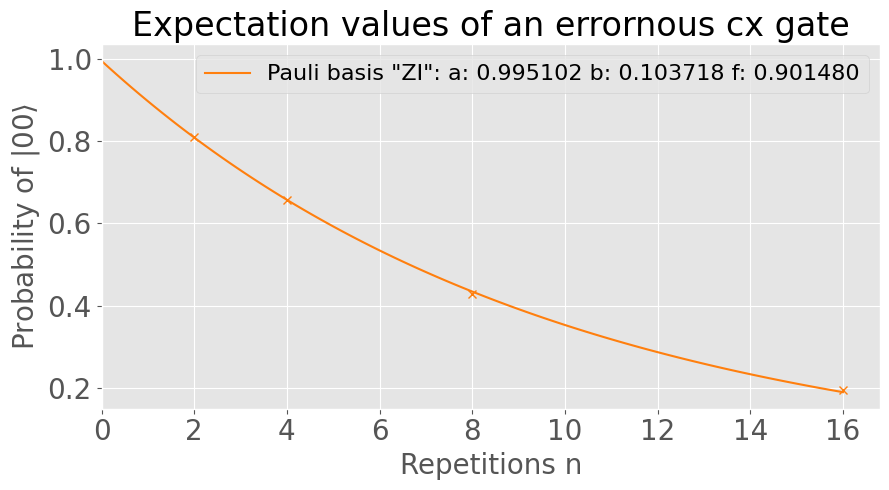

In [81]:
import pickle
with open("termplot.pickle", "rb") as f:
	savefile = pickle.load(f)


j=0
for basis, paulidic in savefile:
	if j!=7:
		j+=1
		continue
	j+=1
	i=0
	fig, ax = plt.subplots(figsize=(9, 5))
	for pauli, pair in sorted(paulidic, key=lambda o: str(o)):
		if i != 1:
			i+=1
			continue
		a = paulidic[(pauli, pair)]["a"]
		b = paulidic[(pauli, pair)]["b"]
		depths = paulidic[(pauli, pair)]["depth"]
		expectations = paulidic[(pauli, pair)]["expectations"]
		axis = np.linspace(0,max(depths), 100)
		#print((a,b, depths, expectations, [a*np.exp(-b*x) for x in axis]))
		colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
		ax.plot(depths, expectations, linestyle = 'None', marker = 'x', color = colors[i])
		ax.plot(axis, [a*np.exp(-b*x) for x in axis], color = colors[i], label="Pauli basis \"" +"".join(reversed("IZ")) + "\": a: " + "%.6f"%(a) +  " b: "+ "%.6f"%(b)+ " f: " + "%.6f"%(np.exp(-b)))
		#", " + "".join(reversed(str(pair))) + 
		i+=1
	textstr = "Measurement Basis: " +str(basis)
	plt.xlabel('Repetitions n', fontsize=20)
	plt.ylabel('Probability of $|00\\rangle$', fontsize=20)
	plt.title('Expectation values of an errornous cx gate', fontsize=24)
	plt.tick_params(axis='both', which='major', labelsize=20)
	#ax.legend(loc='lower left')
	ax.legend(loc='upper right', fontsize=16)
	#ax.set_yscale('log')
	ax.set_xlim(0, max(depths)* 1.05)
	#ax.set_ylim(1*pow(10,-12), 3)
	# Customize the textbox position and appearance
	props = dict(boxstyle='round', facecolor='white', alpha=1)
	#props = dict()

	# Place the textbox in the top-left corner inside the plot (adjust x and y as needed)
	#ax.text(7, 3, textstr, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=props, family='monospace')
	plt.tight_layout() 
	plt.savefig(str(basis)+".png", )
	plt.show()
    

In [ ]:
from random import choices, uniform
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError, pauli_error, depolarizing_error, thermal_relaxation_error, amplitude_damping_error)
from qiskit.quantum_info import Pauli, pauli_basis, Operator
import numpy as np
from qiskit import transpile, QuantumCircuit
shots=102400
if True: # When set to 'True', a preset noisemodel will be choosen. When set to 'False', the noise model will be randomized on every run
	# The kind of Pauli error is choosen
	twoqubit_errorops = [Pauli('YX')] 
	# The respective chance for the Pauli errors is choosen. The two lists need to be equal in length
	twoqubit_errorprobs = [0.15] 
# Create *normalized* error model.
twoqubit_error_template = [(op, p) for op,p in zip(twoqubit_errorops, twoqubit_errorprobs)]+[(Pauli("II"), 1-sum(twoqubit_errorprobs))]
twoqubit_error = pauli_error(twoqubit_error_template)

noise_model = NoiseModel()
#add error model to two-qubit gates.
noise_model.add_all_qubit_quantum_error(twoqubit_error, ['cx','cz'])
#print(twoqubit_error)

circuit = QuantumCircuit(2)
circuit.cx(0,1)
circuit.measure_all()

from qiskit_aer import AerSimulator
backend = AerSimulator()
results = backend.run([circuit], shots=shots, noise_model=noise_model).result().get_counts()
print(results)
average = (shots+results.get('00',0)-results.get('11',0))/(shots*2)
print(average)

{'00': 87158, '11': 15242}
0.85115234375


: 